In [19]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer

# Load the dataset
df = pd.read_csv("smoke_detection_iot.csv")
# Display the first 10 rows of the dataset
print(df.head(10))

   Index         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0      0  1654733331          20.000        57.36          0        400   
1      1  1654733332          20.015        56.67          0        400   
2      2  1654733333          20.029        55.96          0        400   
3      3  1654733334          20.044        55.28          0        400   
4      4  1654733335          20.059        54.69          0        400   
5      5  1654733336          20.073        54.12          0        400   
6      6  1654733337          20.088        53.61          0        400   
7      7  1654733338          20.103        53.20          0        400   
8      8  1654733339          20.117        52.81          0        400   
9      9  1654733340          20.132        52.46          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0   12306        18520        939.735    0.0   0.00    0.0  0.000   0.00    0   
1   12345   

In [20]:
data = pd.read_csv("smoke_detection_iot.csv").drop(['Index', 'UTC', 'CNT'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(data.drop('Fire Alarm', axis=1), data['Fire Alarm'], test_size=0.2)
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [21]:
scaler = Normalizer()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

MODEL_Trainer = KNeighborsClassifier(n_neighbors=1)

MODEL_Trainer.fit(x_train_normalized, y_train)

KNeighborsClassifier(n_neighbors=1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3577
           1       1.00      1.00      1.00      8949

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Confusion Matrix:
[[3573    4]
 [   2 8947]]


Text(0.5, 1.0, 'KNN Confusion Matrix')

<Figure size 640x480 with 0 Axes>

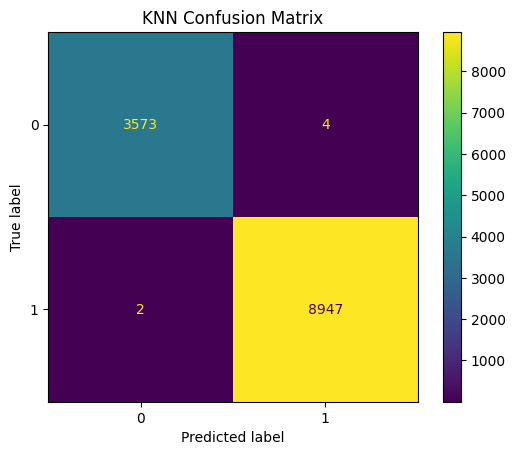

In [22]:
# Predict the trained model on our test data
y_pred = MODEL_Trainer.predict(x_test_normalized)

# Print the Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.title("KNN Confusion Matrix")

In [23]:
accuracies = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_normalized, y_train)
    accuracy = knn.score(x_test_normalized, y_test)
    accuracies.append(accuracy)
    print("K value: ", i, "Accuracy: ", accuracy)

K value:  1 Accuracy:  0.9995209963276385
K value:  2 Accuracy:  0.9994411623822449
K value:  3 Accuracy:  0.9995209963276385
K value:  4 Accuracy:  0.9995209963276385
K value:  5 Accuracy:  0.9992814944914578
K value:  6 Accuracy:  0.9993613284368513
K value:  7 Accuracy:  0.9992016605460642
K value:  8 Accuracy:  0.9991218266006706
K value:  9 Accuracy:  0.9989621587098835
K value:  10 Accuracy:  0.9988823247644899


Text(0.5, 0, 'K')

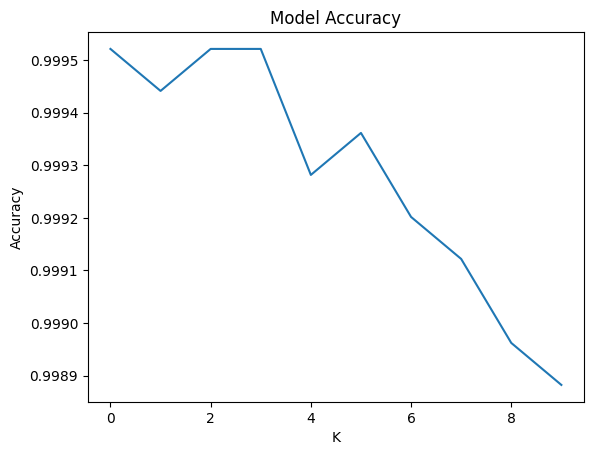

In [25]:
plt.plot(accuracies)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('K')

In [26]:
# Calculate accuracy on training set
train_accuracy = MODEL_Trainer.score(x_train_normalized, y_train)

# Calculate accuracy on testing set
test_accuracy = MODEL_Trainer.score(x_test_normalized, y_test)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on testing set:", test_accuracy)

Accuracy on training set: 1.0
Accuracy on testing set: 0.9995209963276385


Cross-Validation Scores: [0.99920168 0.99880251 0.9990021  0.99970063 0.9993014 ]
Mean CV Accuracy: 0.9992016625366172
Accuracy on Testing Set: 0.9994411623822449
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Confusion Matrix:
[[3588    6]
 [   1 8931]]


<Figure size 640x480 with 0 Axes>

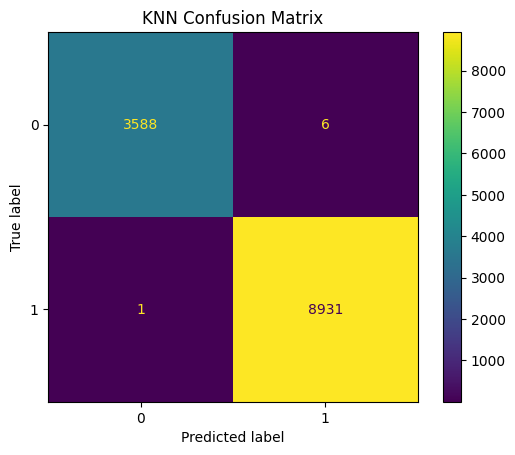

In [27]:
# Based on the accuracy of training set to be perfect 1(100%), Chances of over fitting are high 
# The following code now checks cross validation scores. 
# We can better judge through Cross validation accuracy scores weather overfitting occured or not
# Therefore the following code does that.

# Load the dataset
df = pd.read_csv("smoke_detection_iot.csv")

# Drop unnecessary columns
data = df.drop(['Index', 'UTC', 'CNT'], axis=1)

# Split data into features (X) and target variable (y)
X = data.drop('Fire Alarm', axis=1)
y = data['Fire Alarm']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = Normalizer()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform cross-validation to evaluate model performance
cv_scores = cross_val_score(knn, X_train_normalized, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Train KNN model on the entire training set
knn.fit(X_train_normalized, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test_normalized)

# Evaluate model performance on the testing set
print("Accuracy on Testing Set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.title("KNN Confusion Matrix")

plt.show()